# Regression based data science project to predict home price at Banglore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df1 =pd.read_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\bengaluru_house_prices.csv')

## Data exploration

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [7]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Droping some extra features that is not required to build our model

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data cleaning

### Handling null values

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Our dataset is big so droping these null values would a good move

In [13]:
df3 = df2.dropna()

In [14]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Feature Engineering

Add a new feature(Integer) for BHK

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-17-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [20]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Explore total sqft feature

In [21]:
df3.total_sqft.nunique()

2067

In [22]:
df3.total_sqft.value_counts()

1200           843
1100           221
1500           204
2400           195
600            180
              ... 
3056             1
2401             1
3884             1
896.9            1
24Sq. Meter      1
Name: total_sqft, Length: 2067, dtype: int64

In [23]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [24]:
x='20'

In [25]:
type(x)

str

In [26]:
is_float(x)

True

In [27]:
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [28]:
df3[~df3.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In the above dataframe we can see most of the values are in range so we can just take the average of min and max value, and for others type just drop those types like(34.46Sq. Meter, 4125Perch etc)

In [29]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return((float(token[0])+float(token[1]))/2)
    try:
        return(float(x))
    except:
        return None
    

In [30]:
convert_sqft_to_num('@eih')

In [31]:
convert_sqft_to_num('10-20')

15.0

In [32]:
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [33]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

In [34]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [36]:
df4 = df4[df4.total_sqft.notna()]

In [37]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering 

adding new column price per sqft

In [38]:
df5 = df4.copy()
df5['price_per_sqft'] = df5.price*(1e5)/(df5['total_sqft'])
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [39]:
df5.to_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\bhp.csv', index=False)

In above dataframe location is a categorical variable so we need to apply dimensional reduction here

In [40]:
df5['location']  = df5.location.apply(lambda x: x.strip())

In [41]:
location_stats = df5.location.value_counts()
location_stats

Whitefield           533
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       264
Thanisandra          235
                    ... 
Fraser town            1
elachenahalli          1
Thirupalya             1
sapthagiri Layout      1
Bennigana Halli        1
Name: location, Length: 1287, dtype: int64

In [42]:
len(location_stats)

1287

In [43]:
location_stats.values.sum()

13200

In [44]:
location_stats[location_stats>10]

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Nehru Nagar                   11
Pattandur Agrahara            11
LB Shastri Nagar              11
2nd Phase Judicial Layout     11
Bommenahalli                  11
Name: location, Length: 240, dtype: int64

Now lenth reduced to 240 it is possible to create 240 columns

## Dimensionality reduction

Any location having less than 10 data points shoulds be tagged as other

In [45]:
location_ststs_lessthan_10 = location_stats[location_stats<=10]

In [46]:
location_ststs_lessthan_10

Thyagaraja Nagar       10
Sector 1 HSR Layout    10
Gunjur Palya           10
Kalkere                10
BTM 1st Stage          10
                       ..
Fraser town             1
elachenahalli           1
Thirupalya              1
sapthagiri Layout       1
Bennigana Halli         1
Name: location, Length: 1047, dtype: int64

In [47]:
df5.location  = df5.location.apply(lambda x : 'other' if x in location_ststs_lessthan_10 else x)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [48]:
len(df5.location.unique())

241

## Outlier Removal using Business logic

Gerenally sqft per 'bhk' is 300 sqft and when you found 400 sqft for two bhk so it is suspecious and it shold be corrected 

In [49]:
df5[((df5.total_sqft)/(df5.bhk))<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


check above data frame we have 1020 sqft with 6 bhk and 600 sqft with 9 bhk these are clear error and needs to be removed

In [50]:
df5.shape

(13200, 7)

In [51]:
df6 = df5[~(((df5.total_sqft)/(df5.bhk))<300)]
df6.shape

(12456, 7)

## Outlier Removal Using Std and Mean

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here min price is 267 and max is 176470 so these type of value should be removed, we will use normal distribution and one sigma(68%) range

In [53]:
def Remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        sm = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        r_df = subdf[(subdf.price_per_sqft>(sm-std)) & (subdf.price_per_sqft<=(sm+std))]
        df_out = pd.concat([df_out,r_df],ignore_index= True)
    return df_out
        

Use this to understand function:

for key,subdf in df6.groupby('location'):
    print(i)
   
   

In [54]:
df7 = Remove_pps_outlier(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


### Lets check if for a particular location ho does the price of 2bhk and 3bhk looks like

In [55]:
df7.location.value_counts()

other                   2306
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Banjara Layout             4
HAL 2nd Stage              4
Vishwapriya Layout         4
Vishveshwarya Layout       4
Marsur                     3
Name: location, Length: 241, dtype: int64

In [56]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft, bhk2.price, color= 'red', marker = '+', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color= 'green', marker = '.', s=50)
    
  
    plt.xlabel('Total sqft')
    plt.ylabel('Price')
    plt.legend(['2bhk','3bhk'])
    plt.title(location)

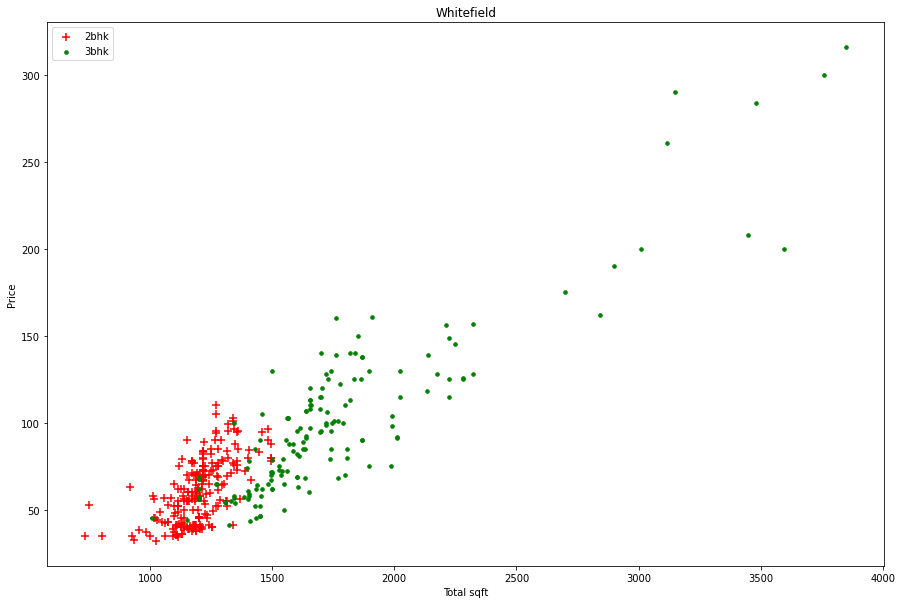

In [57]:
plot_scatter_chart(df7,'Whitefield')

Nearly around 1200-1400 sqft some data points have more price for 2bhk than 3bhk

### We shold remove those 2bhk whose price is less than 1bhk for the same location  

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])# for all location its shold not be empty start
    for location,location_df in df.groupby('location'):
        #print(location_df)
        bhk_stats = {}#for all location we need it empty start
        for bhk,bhk_df in location_df.groupby('bhk'):
            #print(bhk_df)
            bhk_stats[bhk]={
                    'mean': np.mean(bhk_df.price_per_sqft),
                    'std': np.std(bhk_df.price_per_sqft),
                    'count': bhk_df.shape[0]
                }
            #print(bhk_stats)
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            #print(stats)

            if stats and stats['count']>5:
                #print(stats)
                #print(bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                #print(exclude_index)

    return df.drop(exclude_indices,axis='index')


        
    

In [59]:
df8 = remove_bhk_outliers(df7)
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10233,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10234,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10237,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [60]:
df7.shape

(10242, 7)

### Lets see the old scatter plot now 

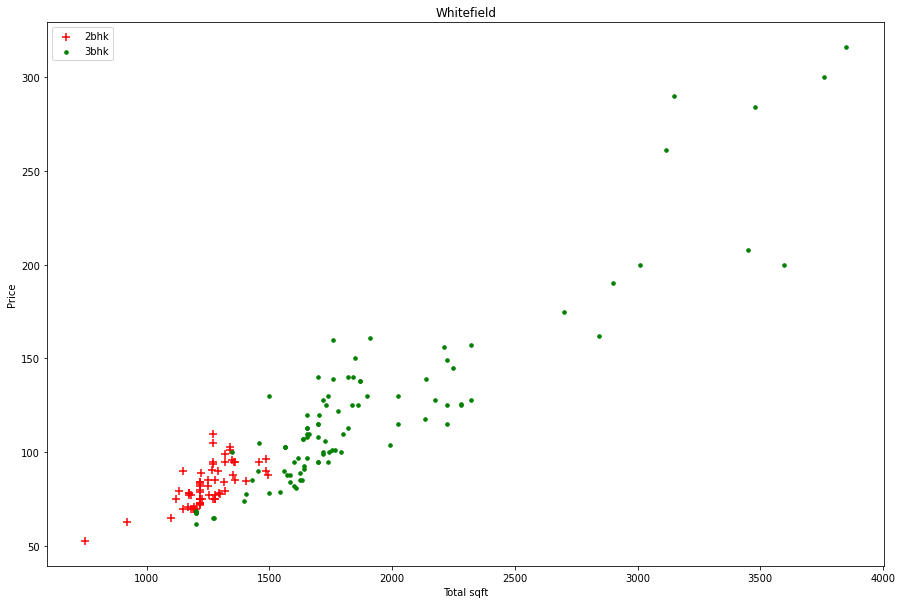

In [61]:
plot_scatter_chart(df8,'Whitefield')

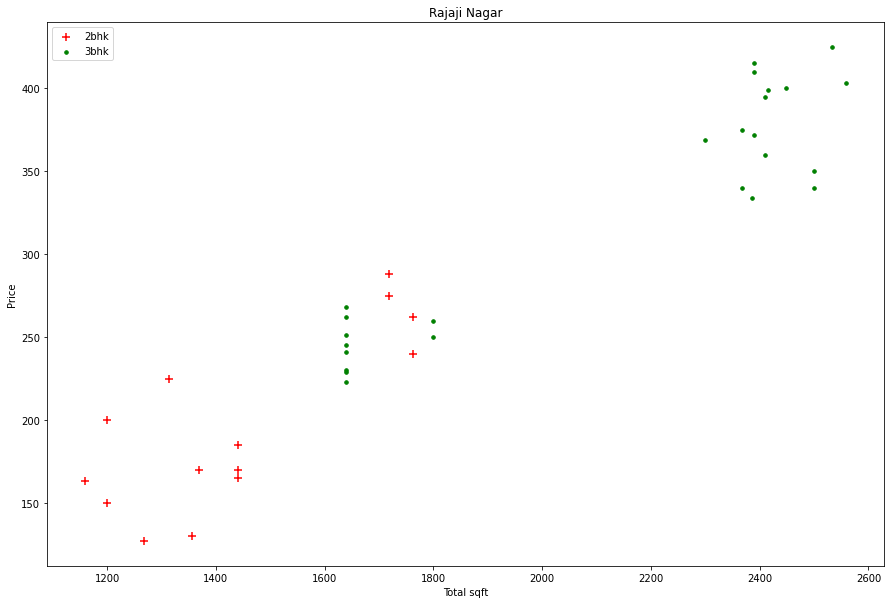

In [62]:
plot_scatter_chart(df8,"Rajaji Nagar")

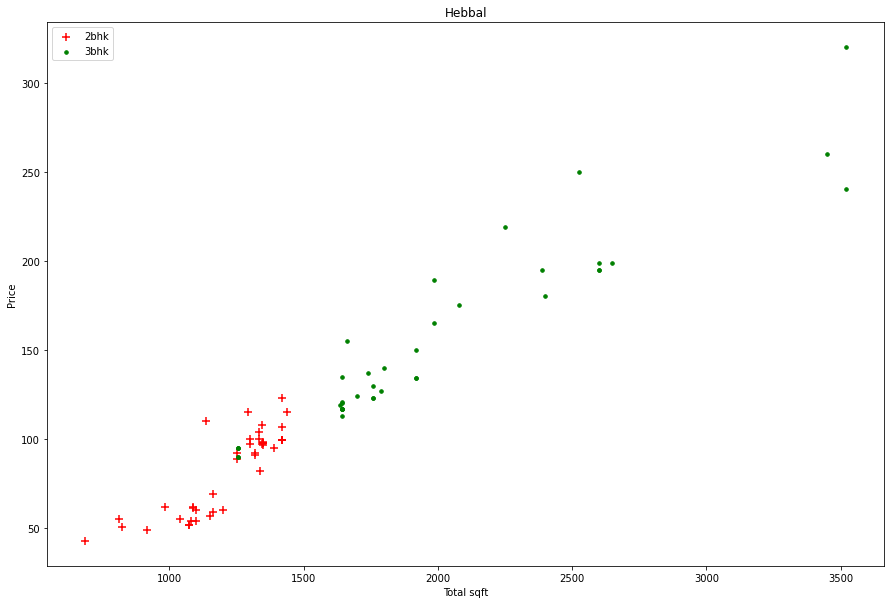

In [63]:
plot_scatter_chart(df8,"Hebbal")

### Hence it reduce upto some extent

In [64]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


Text(0, 0.5, 'count')

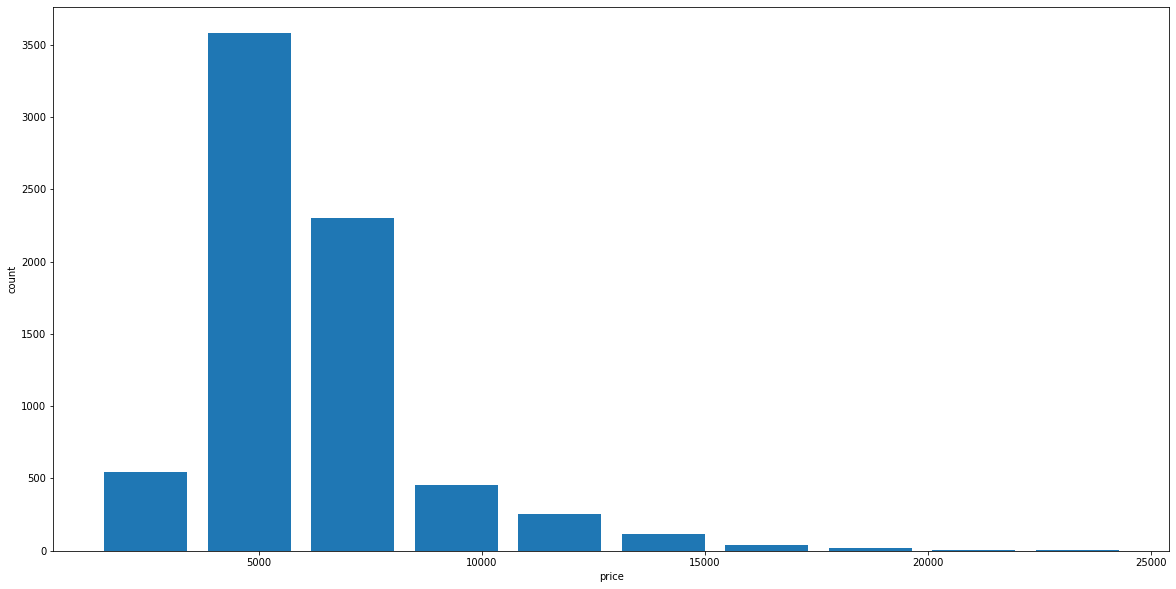

In [65]:
plt.hist(df8.price_per_sqft, rwidth=0.8);
plt.xlabel('price')
plt.ylabel('count')

## Outlier removel using Bathroom feature

In [66]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [67]:
df8.bath.nunique()

12

In [68]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

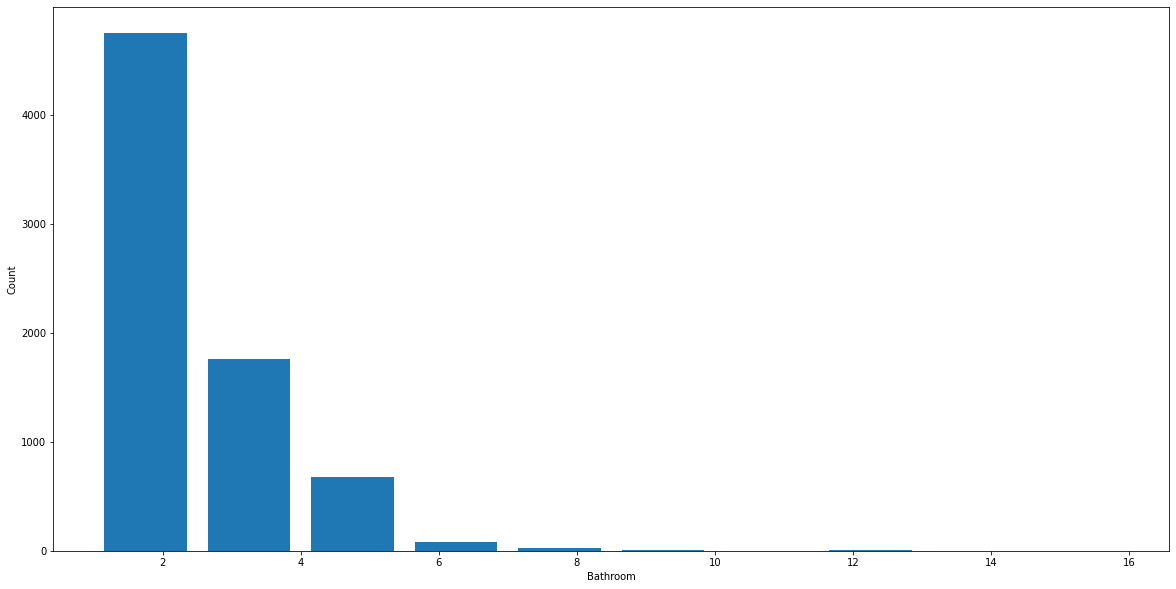

In [69]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Bathroom')
plt.ylabel('Count');

In [70]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [71]:
df8[df8.bath > (df8.bhk + 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Here we are considering limits of bathrooms upto one more than the bedrooms

In [72]:
df9 = df8[df8.bath < (df8.bhk +2)]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10233,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10234,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10237,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


### Now our data is almost clean, just need to drop 'size' and 'price_per_sqft'

In [73]:
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## One Hot Encoding

Using one Hot Encoding get dummey columns by using pandas library

In [74]:
dummies = pd.get_dummies(df10.location)

In [75]:
dummies.drop(['other'],axis='columns')

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df10.shape

(7239, 5)

In [77]:
df11 = pd.concat([df10, dummies.drop(['other'], axis='columns')], axis= 'columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df12 = df11.drop(['location'], axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## First looking into a Regression model 

In [118]:
x = df12.drop(['price'], axis = 'columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Using train_test_split to avoide of over fitting 

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [83]:
len(x_train)

5791

In [84]:
len(x_test)

1448

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lin_rgr = LinearRegression()

In [87]:
lin_rgr.fit(x_train,y_train)

LinearRegression()

In [88]:
lin_rgr.score(x_test,y_test)

0.7968425604934488

## To measure accuracy of our linear regression model use K Fold cross validation

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits= 5, random_state=0, test_size=0.2)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

By linear regression we are getting above 80% in all five folds 

### Lets check for other methods score

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [97]:
algos = {
    'linear_Regression':{
        'model': LinearRegression(),
        'params':{
            'normalize': [True, False]
        }
    },
    'lasso':{
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']

        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}

In [99]:
def search_best_Regesssion_model (x,y,algos):
    
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for model_name, value in algos.items():
        gs = GridSearchCV(value['model'],value['params'], cv=cv )
        gs.fit(x,y)
        score.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return (pd.DataFrame(score))
        
        
        
        
        
    
   

In [100]:
 search_best_Regesssion_model (x,y,algos)

,model,best_score,best_params
0,linear_Regression,0.848889,{'normalize': True}
1,lasso,0.711079,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721794,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### By above df we can see we are good to go with linear_regression model for this problem

## Testing model for few properties

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [135]:
def price_prediction(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    p = np.zeros(len(x.columns))
    p[0] =sqft
    p[1] =bath
    p[2] =bhk
    
    p[loc_index] = 1
    
    return lin_rgr.predict([p])[0]
    

In [136]:
price_prediction('2nd Phase Judicial Layout', 1000, 4,4)

32.89695936445214

In [137]:
price_prediction('1st Phase JP Nagar', 2850, 4,4)

225.5708074365897

In [138]:
price_prediction('Vijayanagar', 2850, 4,4)

204.12067801154353

## Exporting tested model to a pickel file

In [139]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lin_rgr,f)

## Now saving columns name for later prediction in json file

In [142]:
import json
columns = { 
    'data_columns': [col for col in x.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))
        
    